## Handling Missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  1) mean/meadian/mode imputation

In [2]:
df = pd.read_csv("titanic_train.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,var,median):
    df[var+"_median"] = df[var].fillna(median)


In [4]:
median = df.Age.median()
median

28.0

In [5]:
impute_nan(df,'Age',median)

In [6]:
df.head(6)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0


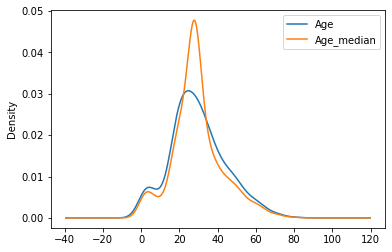

In [7]:
df.Age.plot(kind="kde")
df.Age_median.plot(kind="kde")
plt.legend()

## Advantages
    - Easy to implement
    - Faster way to obtain the complete dataset

## Disadvantages
    - Change or Distortation in the original variance
    - impacts corellation

 ### 2) Random sample imputation

In [8]:
df = pd.read_csv("titanic_train.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
#you can see you are getting random sample every time
df['Age'].dropna().sample()

145    19.0
Name: Age, dtype: float64

In [12]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [13]:
df.Age.median()

28.0

In [14]:
def impute_nan(df,variable,median):
    df[variable+'_median'] =df[variable].fillna(median)
    df[variable+'_random'] =df[variable]
    
    #creating random sample to fill na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #to merge datasets we should have same index
    random_sample.index = df[df[variable].isnull()].index
    #this means replace all the Age-random rows to random sample in which df['Age']=Nan
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [15]:
impute_nan(df,'Age',28)
df.head(6)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0


In [16]:
df['Age_random'].isnull().sum()

0

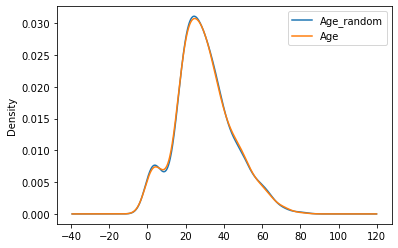

In [17]:
df["Age_random"].plot(kind="kde")
df["Age"].plot(kind="kde")

plt.legend()

### Advantages
    - easy to implement
    - There is no distortion in variance
    
### Disvantages
    -In every situation randomness wont work

### 3) Capturing NaN values with a new feature
It works well if the data are not missing completely at random

In [18]:
df = pd.read_csv("titanic_train.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df['Age_NAN'] = np.where(df["Age"].isnull(),1,0)

In [20]:
df.head(6)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1


### Advantages
    - easy to implement
    - Captures the importance of missing values
    
### Disadvantages
    - Creating Additional Features(Curse of Dimensionally)

## 4) End of Distrubation imputation

In [21]:
df = pd.read_csv("titanic_train.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

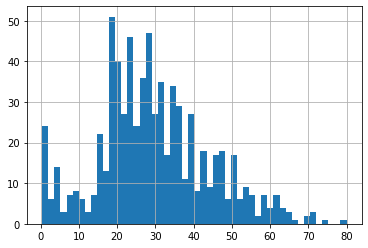

In [22]:
df.Age.hist(bins=50)


In [23]:
extreme = df.Age.mean() + 3*df.Age.std()
median = df.Age.mean()

<AxesSubplot:xlabel='Age'>

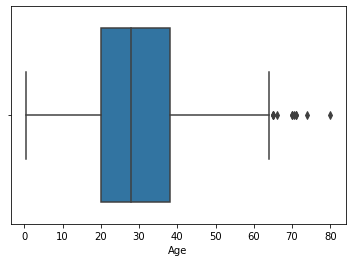

In [24]:
sns.boxplot(data=df,x="Age")

In [25]:
def impute_nan(df,var,median,extreme):
    df[var+'_end_distribution'] = df[var].fillna(extreme)
    df[var].fillna(median,inplace=True)

In [26]:
impute_nan(df,'Age',median,extreme)

In [27]:
df.head(6)

,Survived,Age,Fare,Age_end_distribution
0,0,22.000000,7.2500,22.00000
1,1,38.000000,71.2833,38.00000
2,1,26.000000,7.9250,26.00000
3,1,35.000000,53.1000,35.00000
4,0,35.000000,8.0500,35.00000
5,0,29.699118,8.4583,73.27861


<AxesSubplot:>

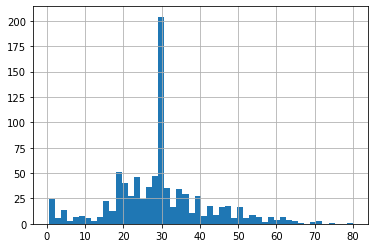

In [28]:
df.Age.hist(bins=50)

<AxesSubplot:>

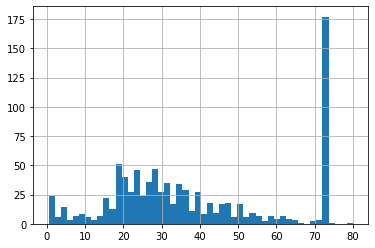

In [29]:
df.Age_end_distribution.hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

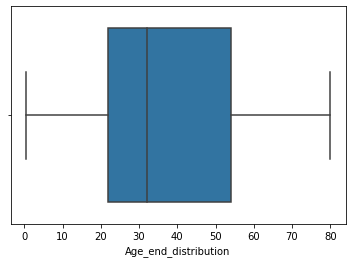

In [30]:
sns.boxplot(data=df ,x='Age_end_distribution')

## Advantages 
    - Easy to implement
    - capture the importance of missing value
    

## Disvantages
    - Distorts the original distributation
    - If missingness is not important, it may mask the predective power of the original variable by distorting its distributation
    - If the number of NA is big, it will mask the true outliers 
    - If the number of NA is small,the replaced NA may be considered an outlier and pre-processed in a subsequent step of feature engneering

### 5) Arbitary value Imputation

It consists of replacing NaN by an arbitrary value


In [31]:
df = pd.read_csv("titanic_train.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
def impute_nan(df,var):
    df[var+"_zeros"] = df[var].fillna(0)
    df[var+"_hundreds"] = df[var].fillna(100)

### Arbitary values
#### 1. It should not be more frequently present 


In [34]:
impute_nan(df,"Age")

<AxesSubplot:>

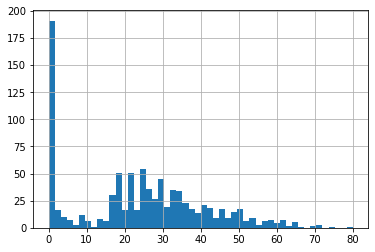

In [38]:
df["Age_zeros"].hist(bins=50)

<AxesSubplot:>

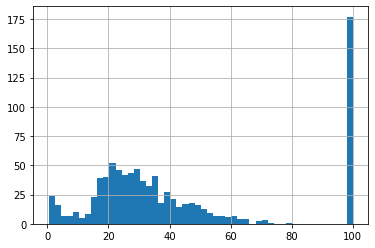

In [39]:
df["Age_hundreds"].hist(bins=50)

### Advantages 

#### - easy to implement
#### - Capture the importance of missing values

### Disadvantages

#### - Distorts the original distribution
#### - If missingness is not important, it may mask the predective power of the original variable by distorting its distributation
#### - Hard to decide which value to use